# COVID-19 Cases per Mio

In [57]:
import pandas as pd
from plotnine import *

### Fetch

In [58]:
df = pd.read_csv("https://opendata.ecdc.europa.eu/covid19/casedistribution/csv")

### Prepare

In [59]:
df = df.assign(Date=pd.to_datetime(df.dateRep, format='%d/%m/%Y'),
               Cases_per_Mio=df.cases / df.popData2019 * 1e6)
df = df[(df.countriesAndTerritories.isin(["Switzerland", "United_States_of_America", "Germany", "Sweden"])) &
        (df.Date >= '2020-03-01')]

### Plot

C:\Users\Michael\Anaconda3\lib\site-packages\plotnine\stats\smoothers.py:311: PlotnineWarning: Confidence intervals are not yet implementedfor lowess smoothings.


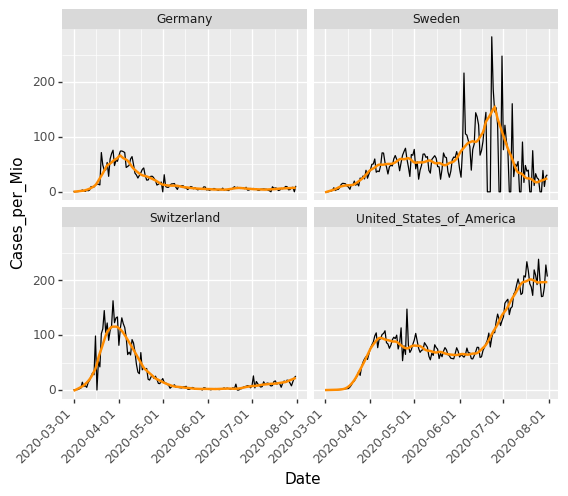

<ggplot: (-9223371945173398868)>

In [56]:
(ggplot(df, aes(x='Date', y='Cases_per_Mio'))
 + geom_line()
 + geom_smooth(span=.1, color='darkorange')
 + facet_wrap('~countriesAndTerritories')
 + theme(axis_text_x=element_text(angle=45, hjust=1)))